In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings



%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Reading DF
df=pd.read_csv('CCA_data.csv')

In [3]:
# First 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Size of df
df.size

147903

In [6]:
# rows*cols in df
df.shape

(7043, 21)

In [7]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Null Values in df
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
# Unique values in all columns
for column in df.columns:
        print(str(column)+" : " +str(df[column].unique()))

customerID : [5375 3962 2564 ... 3367 5934 2226]
gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [1 0 2]
InternetService : [0 1 2]
OnlineSecurity : [0 2 1]
OnlineBackup : [2 0 1]
DeviceProtection : [0 2 1]
TechSupport : [0 2 1]
StreamingTV : [0 2 1]
StreamingMovies : [0 2 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [2505 1466  157 ... 2994 2660 5407]
Churn : [0 1]


In [17]:
# Value counts in df
for column in df.columns:
    print(df[column].value_counts())

5375    1
2667    1
4267    1
4222    1
3815    1
       ..
6899    1
1807    1
1063    1
3007    1
2226    1
Name: customerID, Length: 7043, dtype: int64
1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: 

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Text(0.5, 1.0, 'Target Column Distribution')

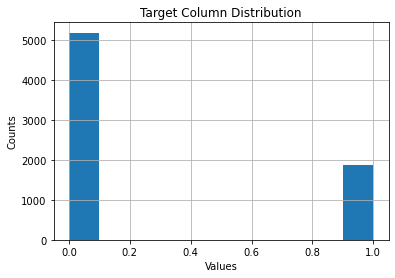

In [20]:

# Plotting histogram to show the distribution of target columnn

plt.figure(figsize=[6,4])
df['Churn'].hist(grid=True)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Target Column Distribution')

 - shows data imbalance

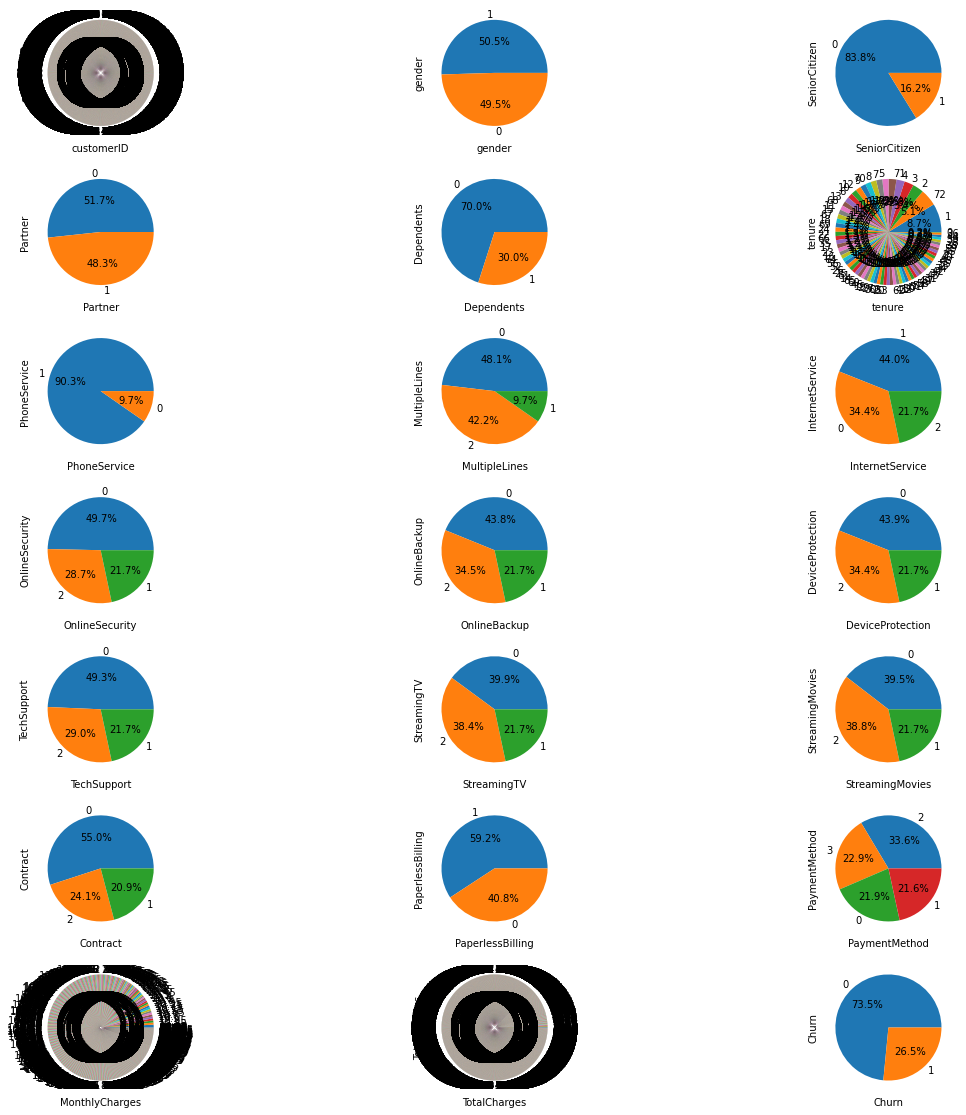

In [33]:
#Distribution of the values inside features 
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        df[i].value_counts().plot.pie(autopct = '%.1f%%')
        plt.xlabel(i)
    plotnumber+=1

 - Distibution of vaues in each feature column. 
 - This can be used to see the bias introduced due to imbalance of values inside the columns
 - Columns that aren't legible just has too many values to read. We will visualise it separately later

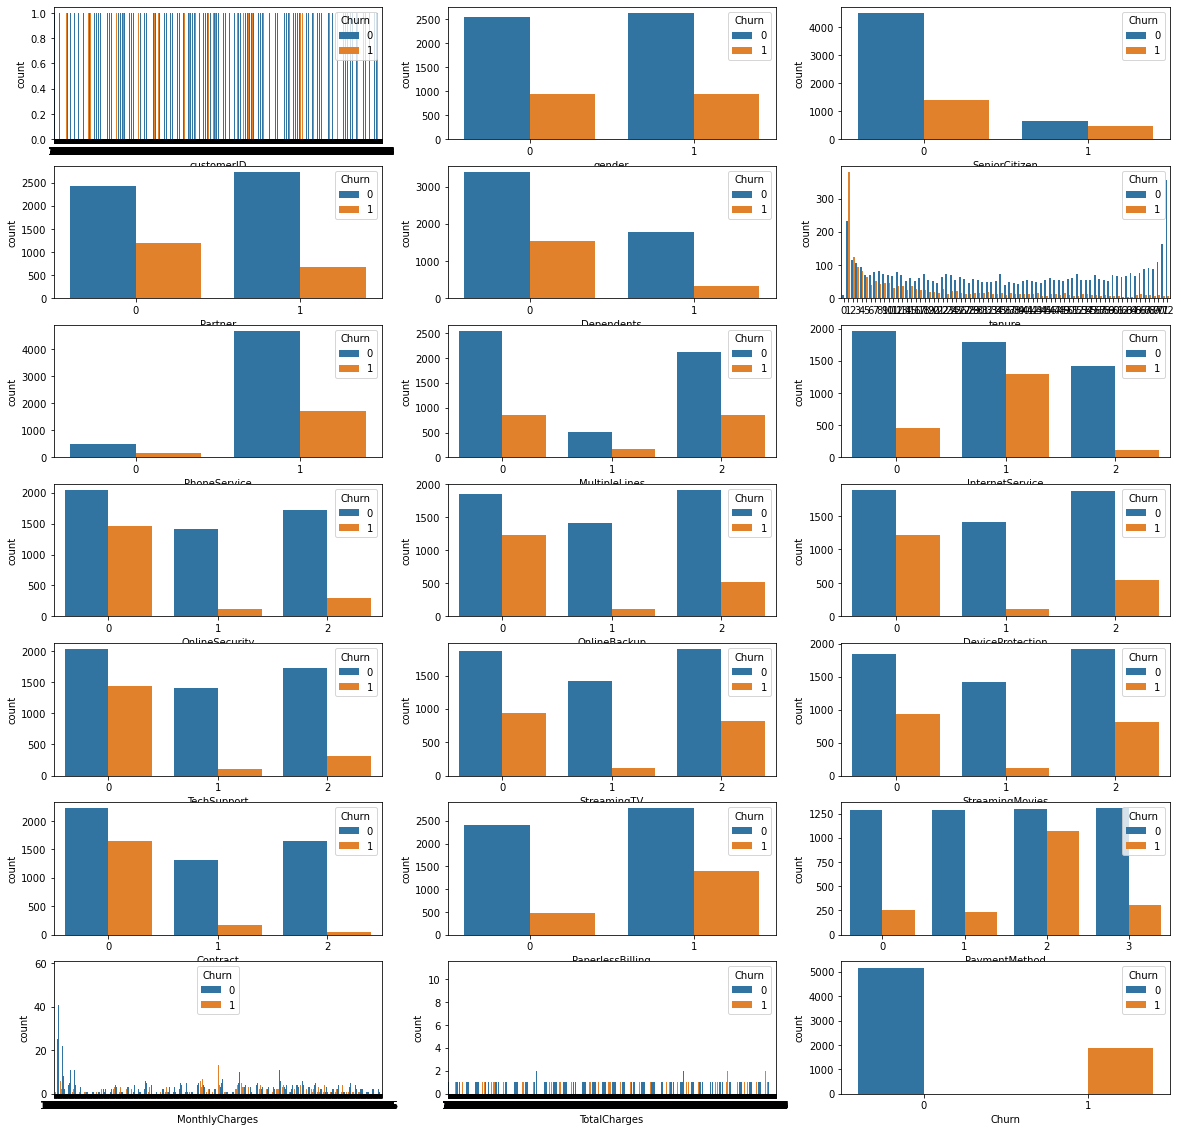

In [34]:
#Distribution of the values inside features according to target column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.countplot(x=df[i], hue=df['Churn'], data=df)
        plt.xlabel(i)
    plotnumber+=1

  - These plots show the value distribution according to the target column.
  - This can be used to see the distribution and correlation of the feature values with target variables independently 

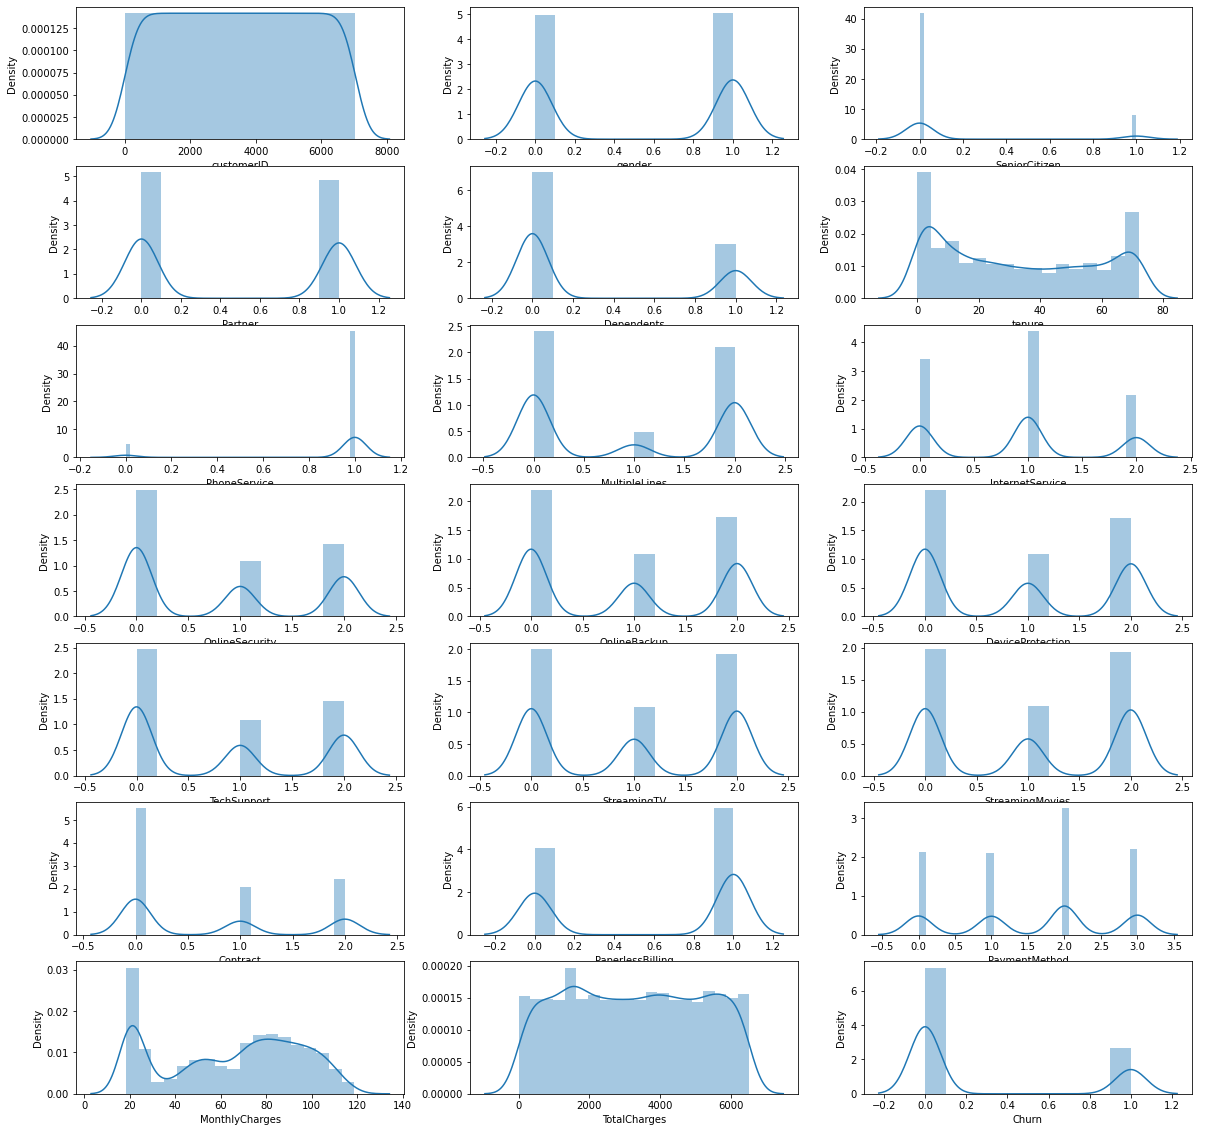

In [36]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

 - We can see some skew present in our data
 - We need to ckeck for outliers before treating skew

<AxesSubplot:>

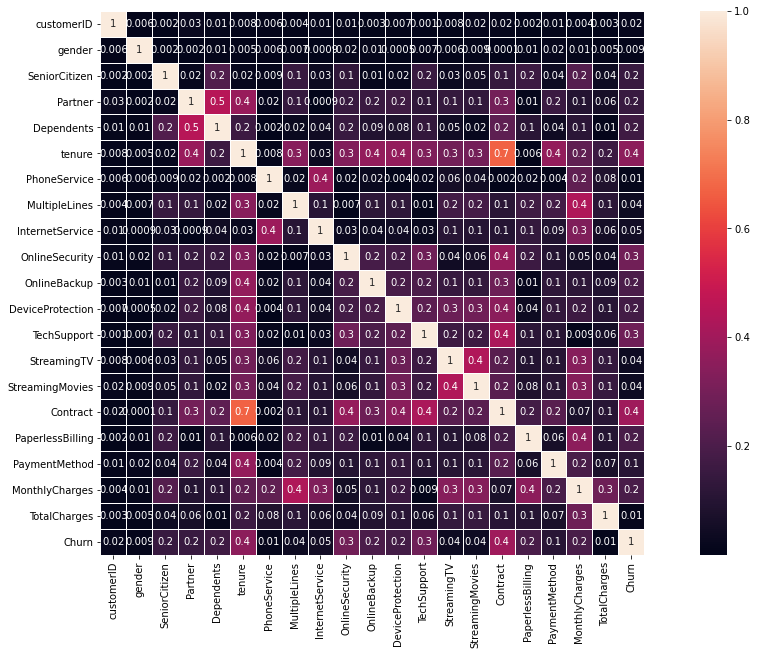

In [37]:
# Correlation plot of columns in df
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

<AxesSubplot:>

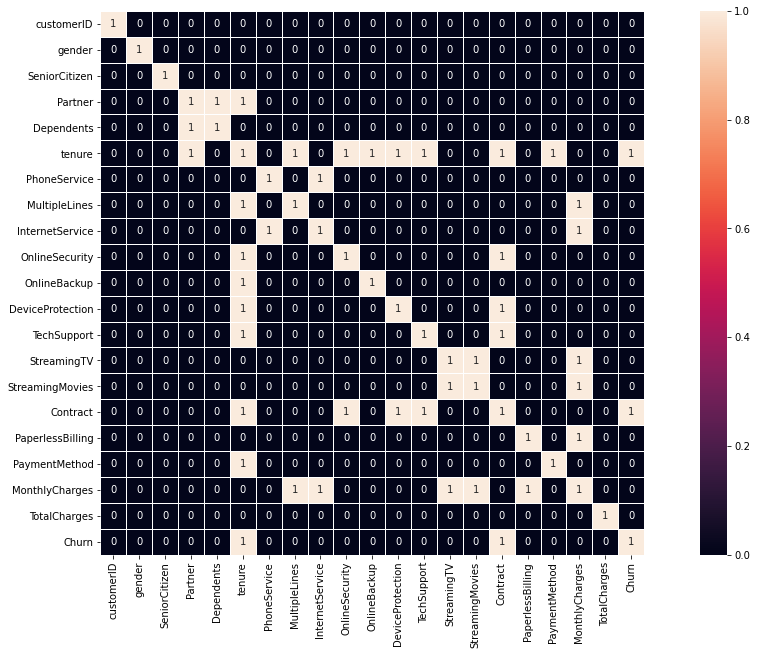

In [40]:
# Correlation plot of columns in df where corr>0.3
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr>0.3,annot=True,square=True,fmt='.1g',linewidth=1)

- Above two plots are visualisations of correlations
- There is no particular need to drop columns. But we will be dropping indexers etc.

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
# Because we don't reqire index
df.drop('customerID',axis=1,inplace=True)

In [43]:
# Columns after drop
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure'>

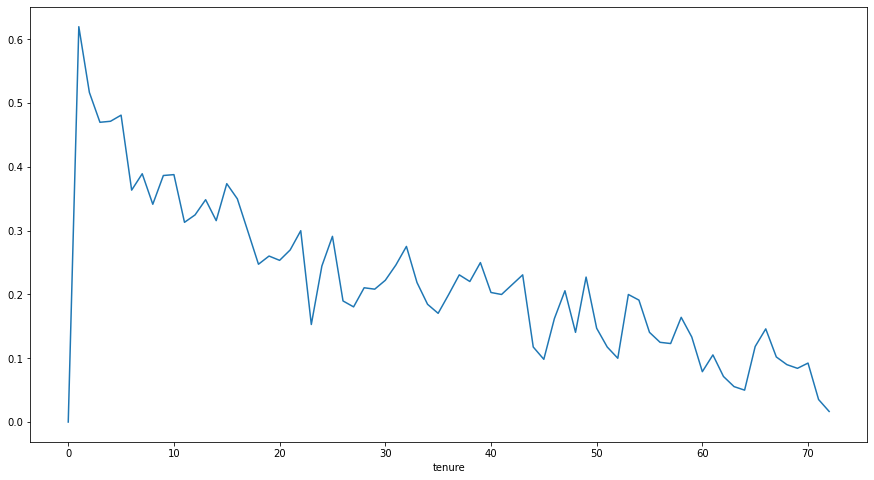

In [48]:
# Distribution of Churn vs Tenure
D=df.groupby('tenure').mean()
plt.figure(figsize=(15,8))
D['Churn'].plot()

 - Churn inversely proportional to tenure

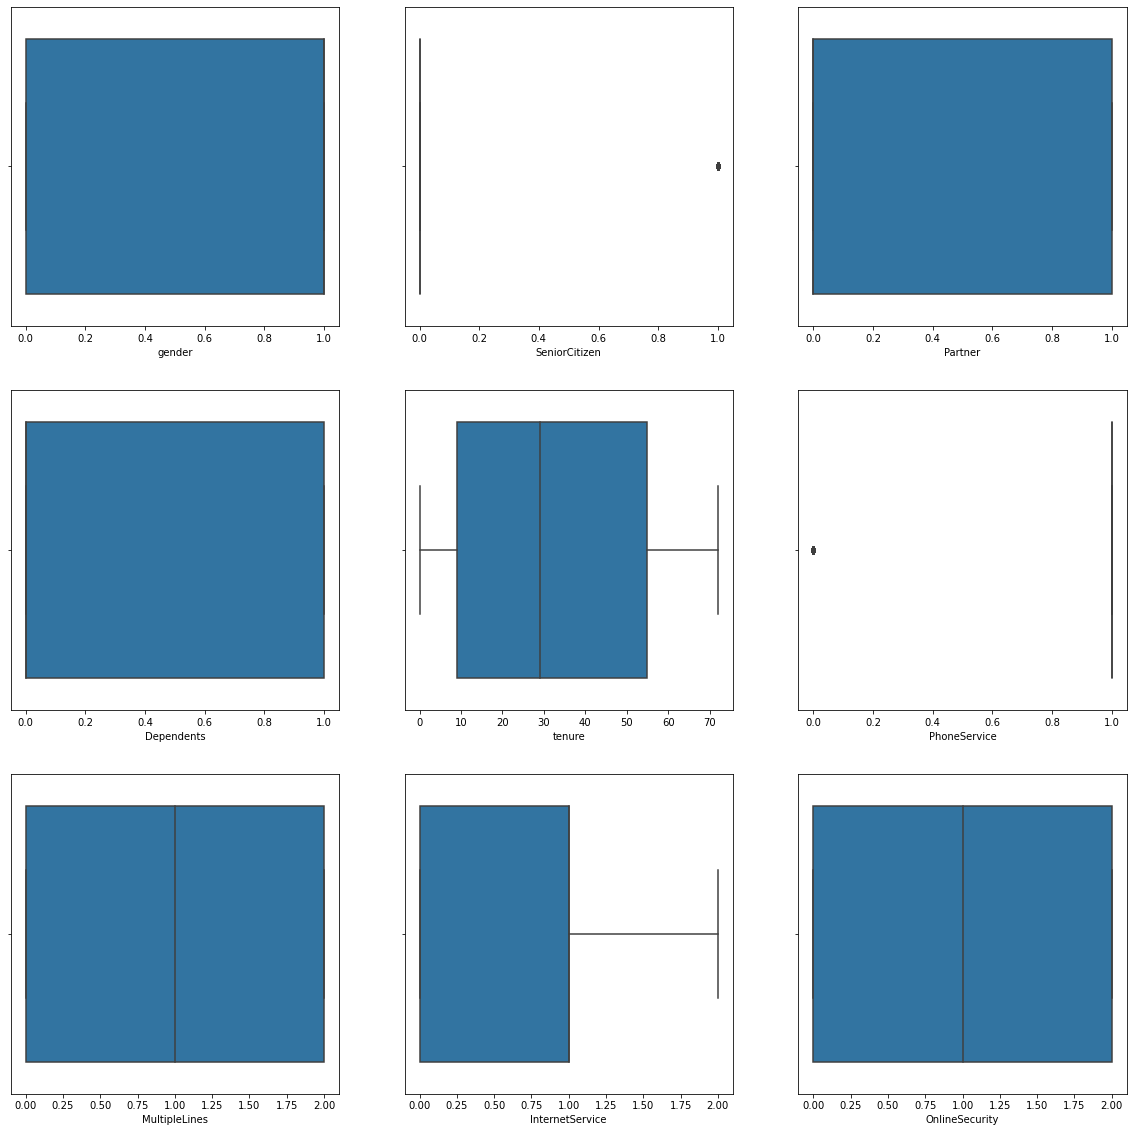

In [60]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [63]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [64]:
df.shape

(7043, 20)

In [65]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [66]:
df.shape

(6361, 20)

- 7043-6361 = 682 rows dropped || (682*100)/7043 = 9.6% data loss

In [69]:
# Skew values before treatment
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

In [70]:
# separating labels and data to predict primary fuel
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

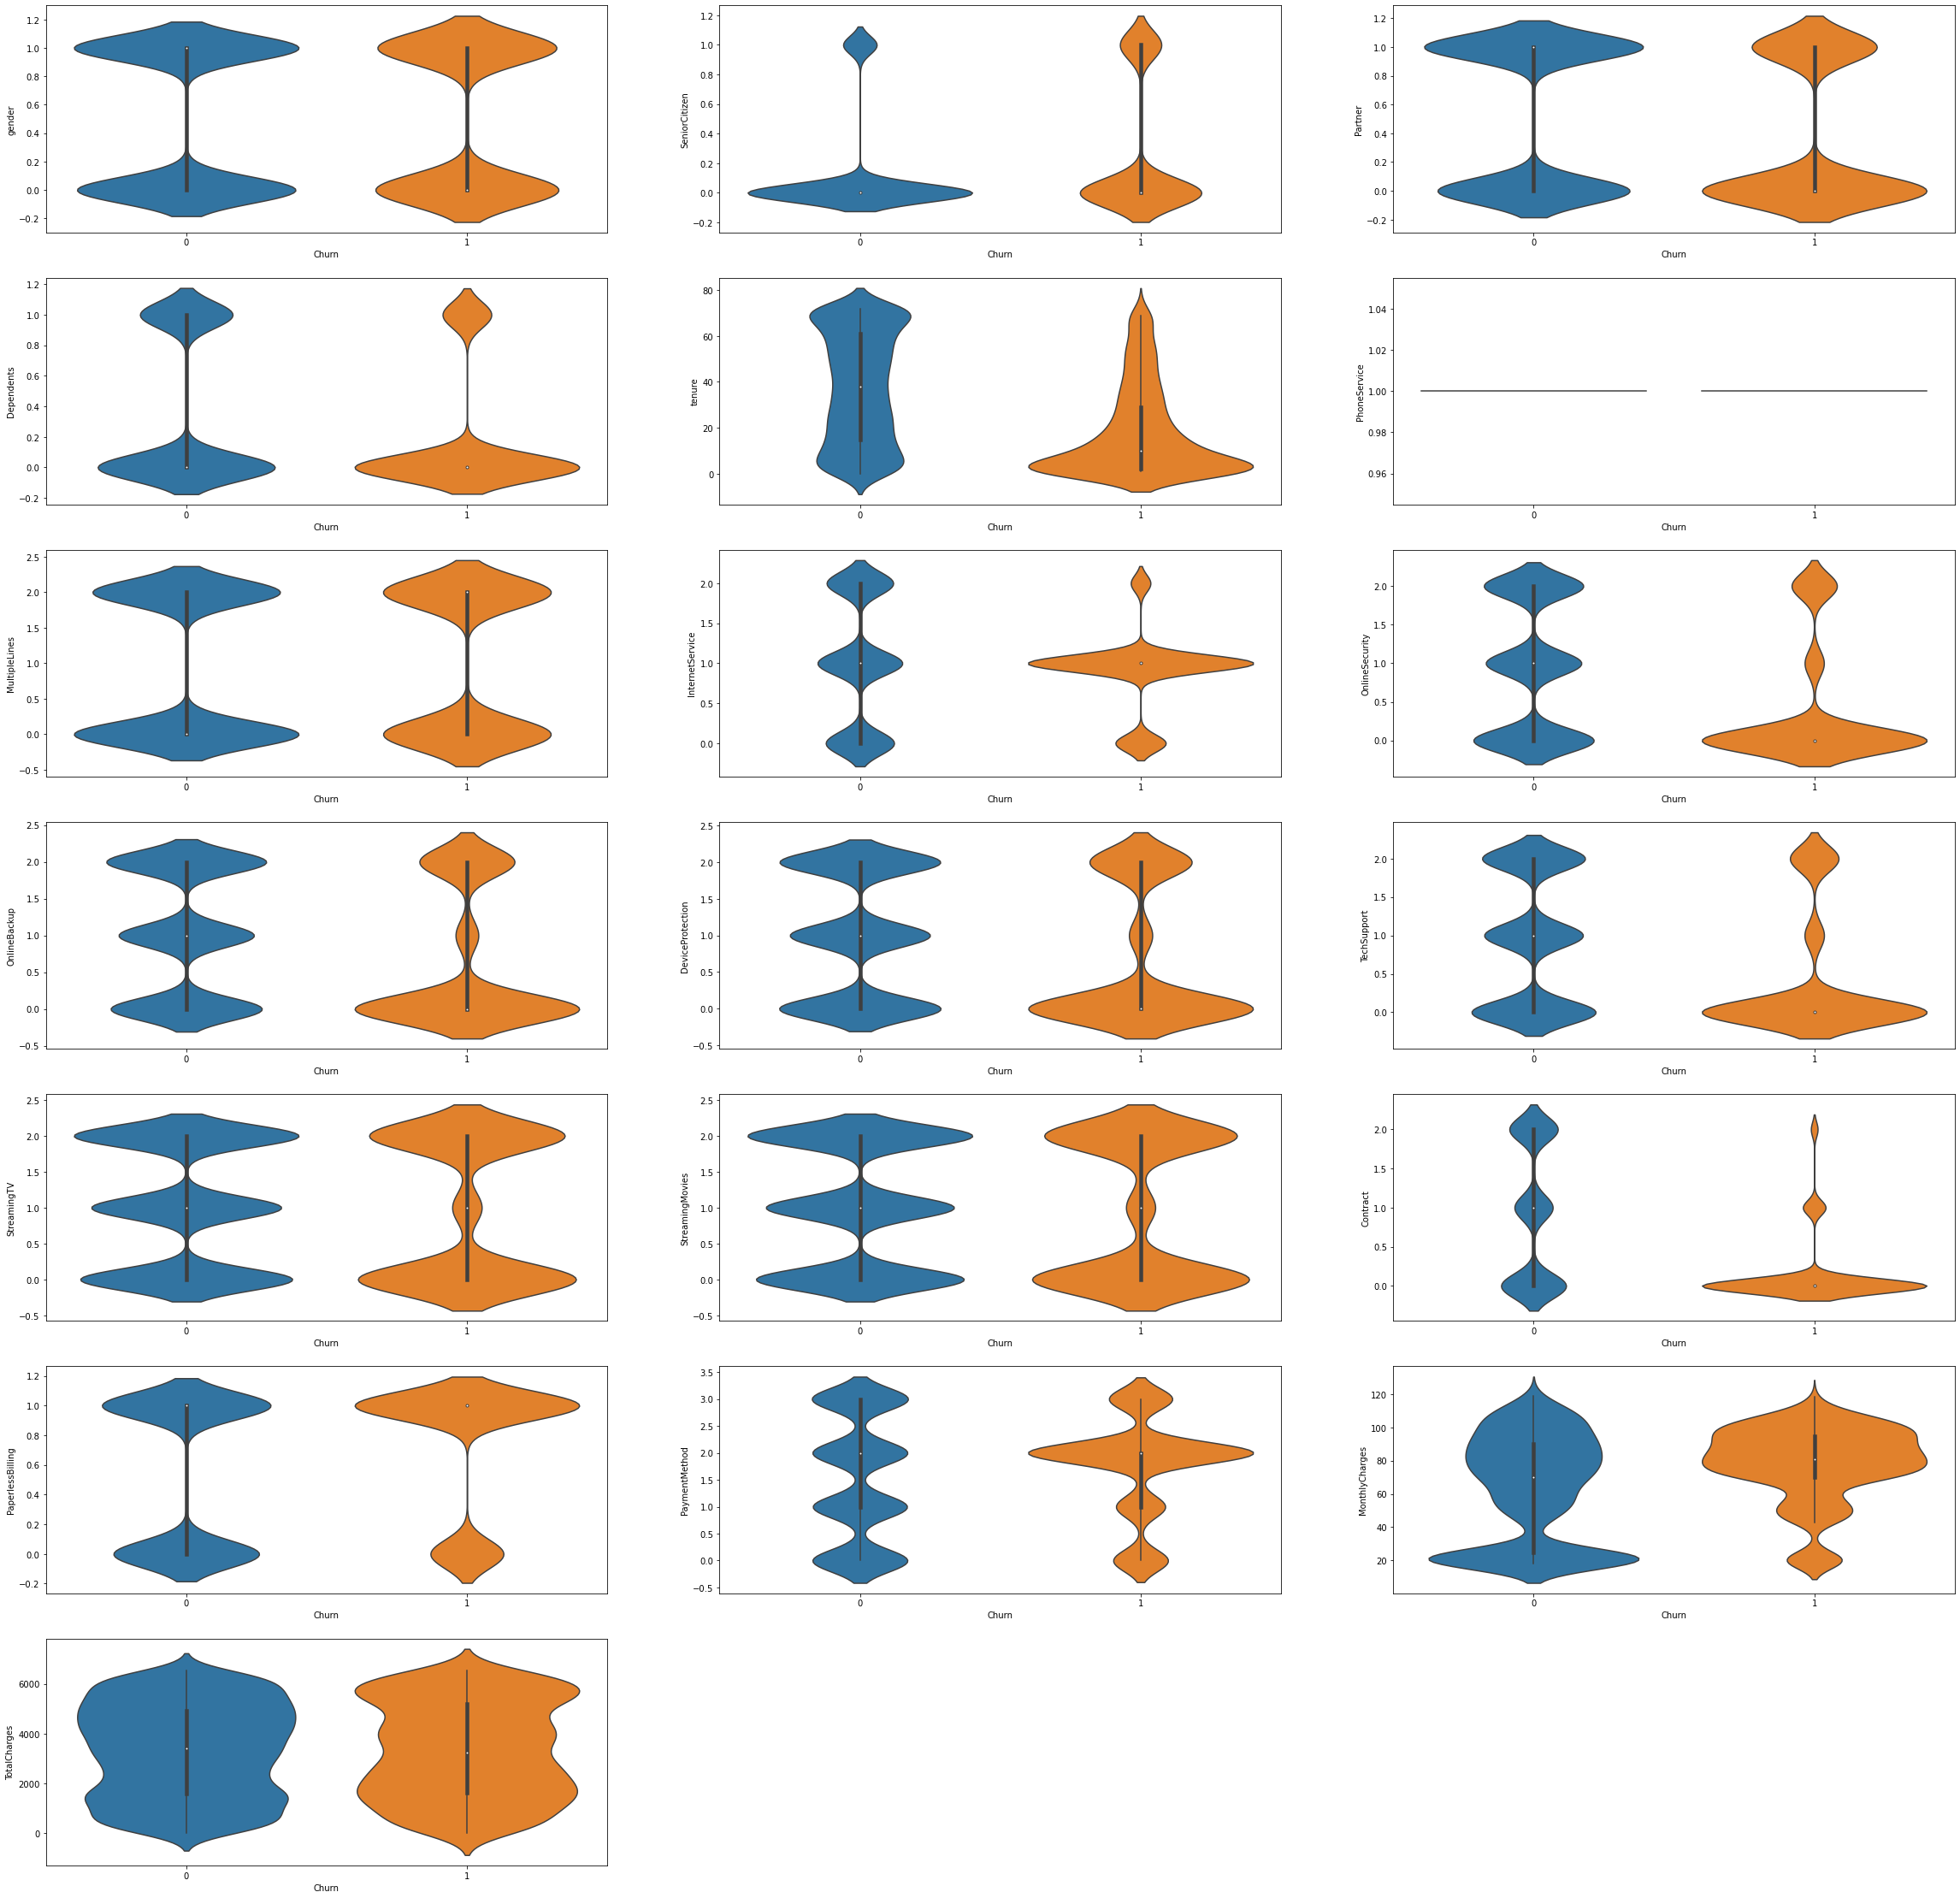

In [72]:
# Relation between features and labels using violin plot
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

In [73]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN
from collections import Counter

counter = Counter(y)
print(counter)
oversample = ADASYN()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({0: 4662, 1: 1699})
Counter({1: 4792, 0: 4662})


In [76]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [77]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

gender              0.311348
SeniorCitizen       2.173241
Partner             0.466230
Dependents          1.405036
tenure             -0.187198
PhoneService        0.000000
MultipleLines       0.097560
InternetService    -0.084966
OnlineSecurity      0.397733
OnlineBackup        0.143764
DeviceProtection    0.139715
TechSupport         0.381243
StreamingTV        -0.052329
StreamingMovies    -0.057034
Contract            0.745529
PaperlessBilling   -0.355886
PaymentMethod      -0.181891
MonthlyCharges     -0.365058
TotalCharges       -0.279617
dtype: float64

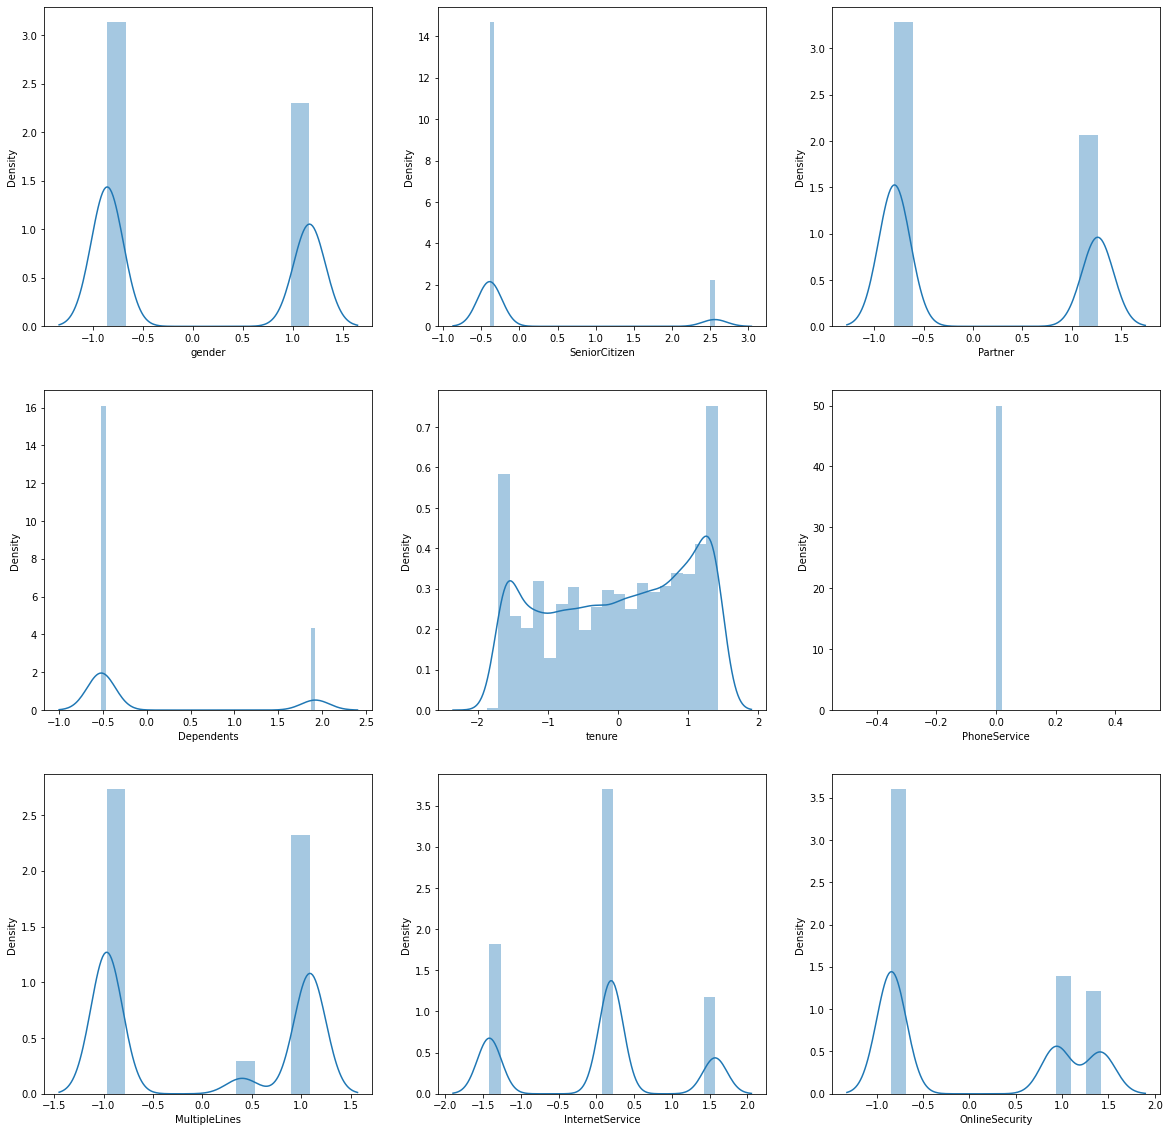

In [78]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [79]:
x = data_new

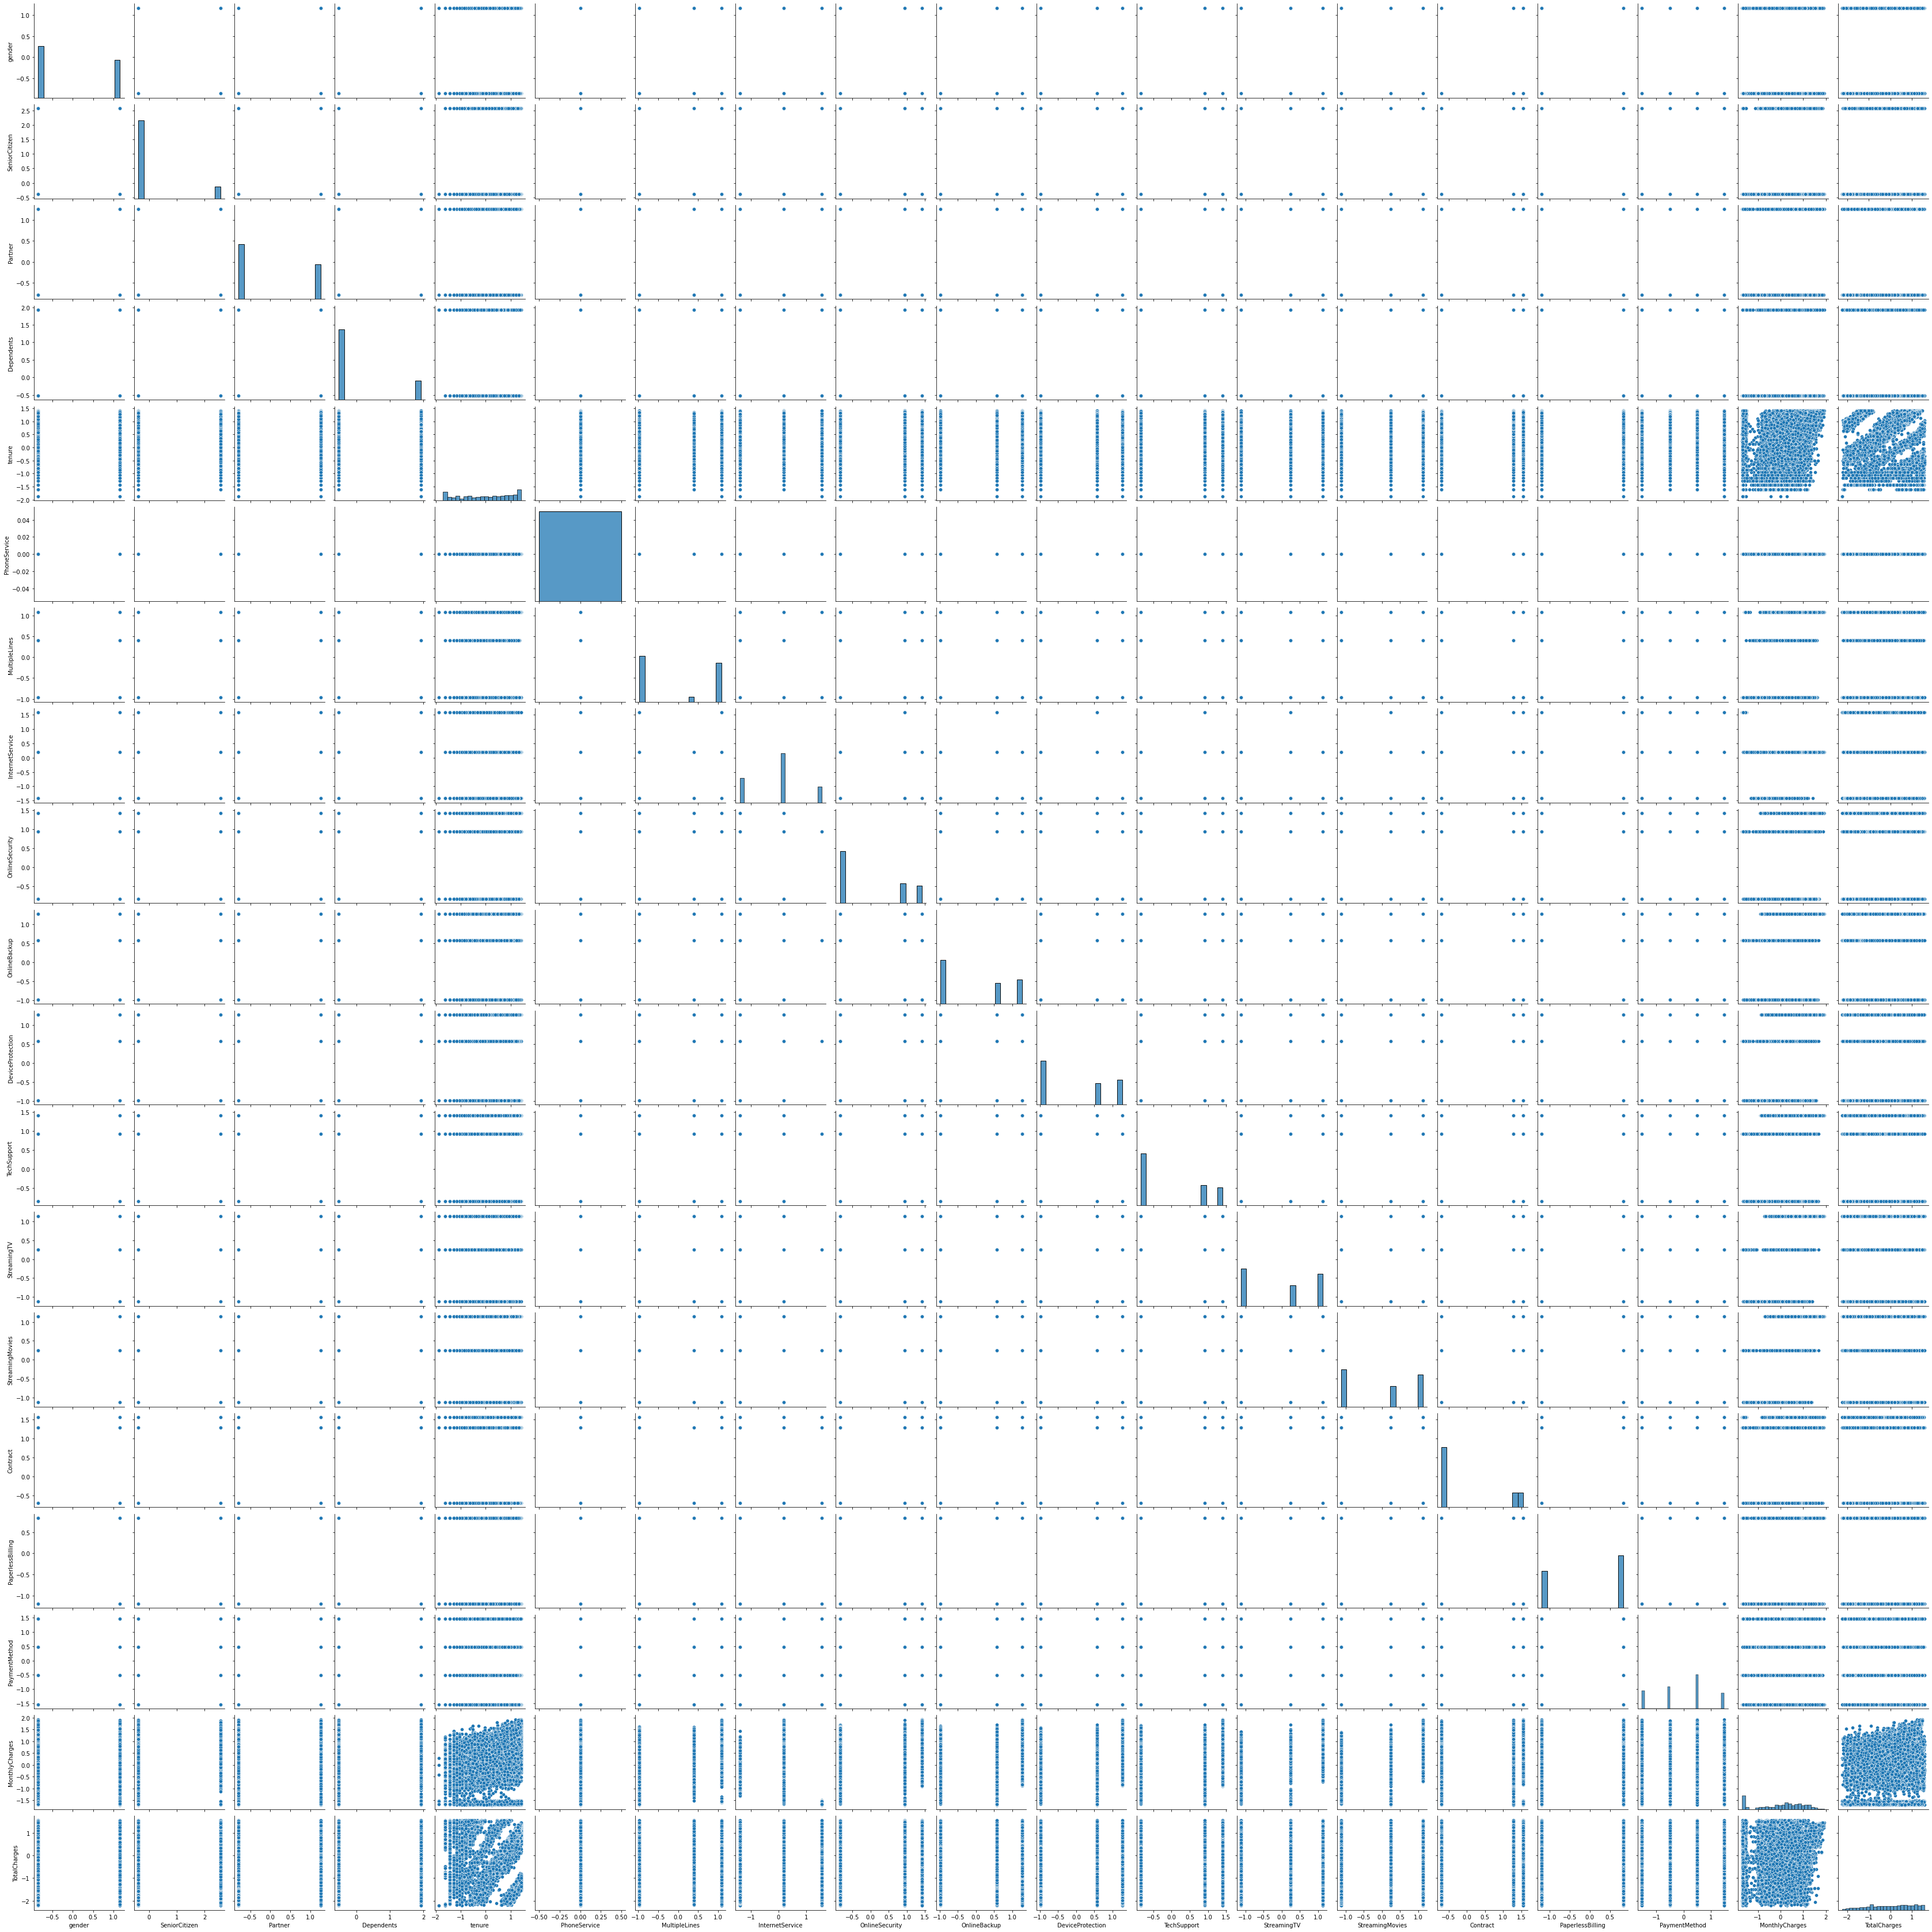

In [80]:
# Pairplot of x
sns.pairplot(x)

 ## Model

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [84]:
#Classifiers :
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(probability=True)

m_list = [knn,dt,rf,svm]

In [87]:
# Fitting Models
for m in m_list:
    m.fit(x_train,y_train)
#     Training------->>>>>
    print(m)
    train_preds = m.predict(x_train)
    print('Accuracy Score :',accuracy_score(y_train,train_preds)*100)
    
#     Testing------->>>>>>
    print(m)
    test_preds = m.predict(x_test)
    te_acc = accuracy_score(y_test,test_preds)*100
    print('Accuracy Score :',accuracy_score(y_test,test_preds)*100)
    
    
#     CV-------->>>>>
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score : ',scr.mean()*100)
    print('Difference between CV_score and acc : ',(te_acc-scr.mean()*100))
    print('\n')
    print('\n')

KNeighborsClassifier()
Accuracy Score : 84.4851904090268
KNeighborsClassifier()
Accuracy Score : 79.14551607445009
cross validation scores below:--  
 KNeighborsClassifier()
Cross validation score :  77.17401000002798
Difference between CV_score and acc :  1.9715060744221091




DecisionTreeClassifier()
Accuracy Score : 99.77433004231312
DecisionTreeClassifier()
Accuracy Score : 79.14551607445009
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score :  77.16375255666635
Difference between CV_score and acc :  1.9817635177837332




RandomForestClassifier()
Accuracy Score : 99.77433004231312
RandomForestClassifier()
Accuracy Score : 85.27918781725889
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score :  83.27763647911718
Difference between CV_score and acc :  2.0015513381417094




SVC(probability=True)
Accuracy Score : 84.93653032440056
SVC(probability=True)
Accuracy Score : 81.64128595600677
cross validation scores below:--

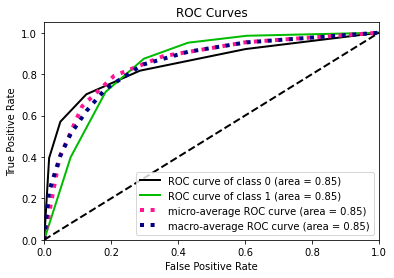

In [88]:
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

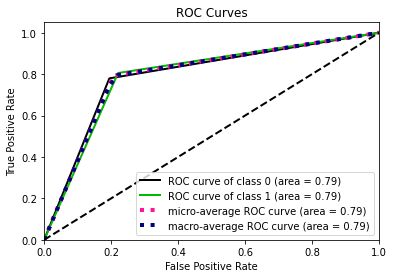

In [89]:
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

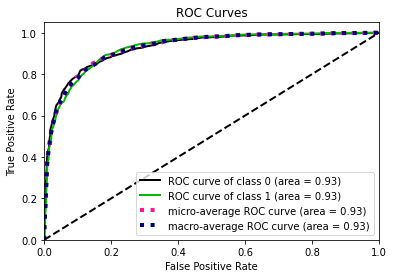

In [90]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

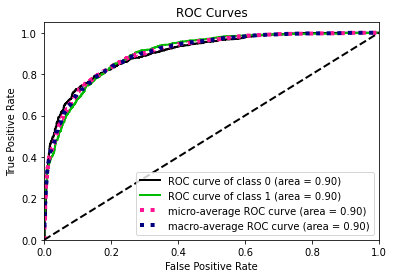

In [91]:
probas=svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

 - Choosing SVC as the best model due to least difference in cv and best  performance in ROC curves

## Hyper-Parameter Tuning (HPT)

In [99]:
# Parameter Grid
grid_param={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale','auto'],
            'break_ties':['True','False'],
            'decision_function_shape':['ovo','ovr']}

In [100]:
grid_search=GridSearchCV(svm,param_grid=grid_param,cv=5,n_jobs=15,verbose = 1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=15,
             param_grid={'break_ties': ['True', 'False'],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [101]:
# Best Parameters
grid_search.best_params_

{'break_ties': 'True',
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

In [103]:
# Model Fitted with best Parameters
dt=SVC(probability=True, break_ties= True, decision_function_shape= 'ovr', gamma= 'scale', kernel= 'rbf')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [104]:
accuracy_score(y_test,y_pred)*100

81.64128595600677

In [105]:
# Classification report of Best model
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.844055,0.795217,0.816413,0.819636,0.818768
recall,0.759649,0.869281,0.816413,0.814465,0.816413
f1-score,0.799631,0.830601,0.816413,0.815116,0.815666
support,1140.000000,1224.000000,0.816413,2364.000000,2364.000000


In [106]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

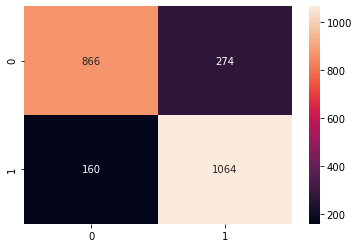

In [108]:
sns.heatmap(cm,annot=True,fmt='d')
plt.savefig('heatmap.png')
plt.show()

## Model Saving

In [109]:
import joblib

joblib.dump(dt,'SVC_best.obj')

['SVC_best.obj']

In [111]:
loaded = joblib.load('SVC_best.obj')

In [114]:
# Predictions from the saved model
pd.DataFrame(loaded.predict(x_test))

,0
0,1
1,1
2,1
3,1
4,1
...,...
2359,1
2360,0
2361,0
2362,0
